# Movies on Netflix, Hulu, Amazon Prime Video, and Disney+ (as of 2021)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("MoviesOnStreamingPlatforms.csv")
df.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


## Data Cleaning

In [3]:
list(df.columns)

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type']

In [4]:
# Drop first 2 columns
df = df.drop(df.columns[[0,1,10]], axis = 1)
df.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,The Irishman,2019,18+,98/100,1,0,0,0
1,Dangal,2016,7+,97/100,1,0,0,0
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0
4,Roma,2018,18+,94/100,1,0,0,0


In [5]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            9515 non-null   object
 1   Year             9515 non-null   int64 
 2   Age              5338 non-null   object
 3   Rotten Tomatoes  9508 non-null   object
 4   Netflix          9515 non-null   int64 
 5   Hulu             9515 non-null   int64 
 6   Prime Video      9515 non-null   int64 
 7   Disney+          9515 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 594.8+ KB


In [6]:
df.isna().sum()

Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
dtype: int64

In [7]:
# Convert Rotten Tomatoes score to Decimal and replace NaN values with 0
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].fillna(0).apply(pd.eval)
df.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,The Irishman,2019,18+,0.98,1,0,0,0
1,Dangal,2016,7+,0.97,1,0,0,0
2,David Attenborough: A Life on Our Planet,2020,7+,0.95,1,0,0,0
3,Lagaan: Once Upon a Time in India,2001,7+,0.94,1,0,0,0
4,Roma,2018,18+,0.94,1,0,0,0


In [8]:
# Fill null values in Age as "Unspecified"
df['Age'].fillna('Unspecified', inplace = True)
df.isna().sum()

Title              0
Year               0
Age                0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
dtype: int64

In [9]:
# Make subsets of each Streaming Service
netflix = df[df['Netflix'] == 1]
hulu = df[df['Hulu'] == 1]
disney = df[df['Disney+'] == 1]
prime = df[df['Prime Video'] == 1]

print("Movies available on Netflix:", len(netflix.index))
print("Movies available on Amazon Prime Video:", len(prime.index))
print("Movies available on Hulu:", len(hulu.index))
print("Movies available on Disney+:", len(disney.index))

Movies available on Netflix: 3695
Movies available on Amazon Prime Video: 4113
Movies available on Hulu: 1047
Movies available on Disney+: 922


**Comment:** There are various overlaps of content between streaming services.

In [10]:
prime.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
116,The Terminal,2004,13+,0.82,1,0,1,0
155,Seven Pounds,2008,13+,0.80,1,0,1,0
158,Les Misérables,2012,13+,0.80,1,0,1,0
184,Underworld,2003,18+,0.79,1,1,1,0
185,The Ring,2002,13+,0.79,1,0,1,0


## Exploratory Data Analysis (EDA)

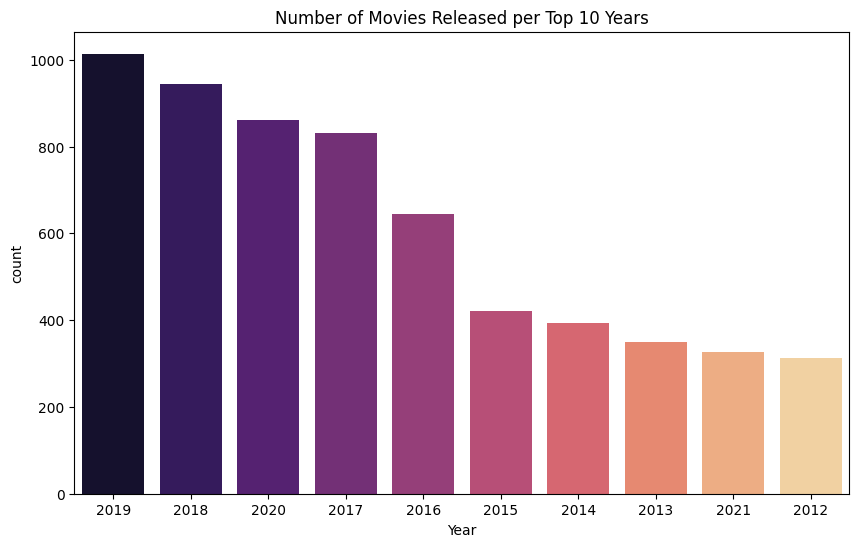

In [11]:
# Busiest Year for Movies

# Count all unique values in Year column
year_counts = df['Year'].value_counts()

# Get top 10 release years
top_years = year_counts.nlargest(10).index

# Filter dataframe to include only top 10 years
df_top_years = df[df['Year'].isin(top_years)]

# Plot number of movies released per top 10 years
plt.figure(figsize=(10,6))
sns.countplot(data=df_top_years, x='Year', palette='magma', order=top_years)
plt.title('Number of Movies Released per Top 10 Years')
plt.show()

In [12]:
age_counts = df['Age'].value_counts()
netflix_age = netflix['Age'].value_counts()
prime_age = prime['Age'].value_counts()
hulu_age = hulu['Age'].value_counts()
disney_age = disney['Age'].value_counts()

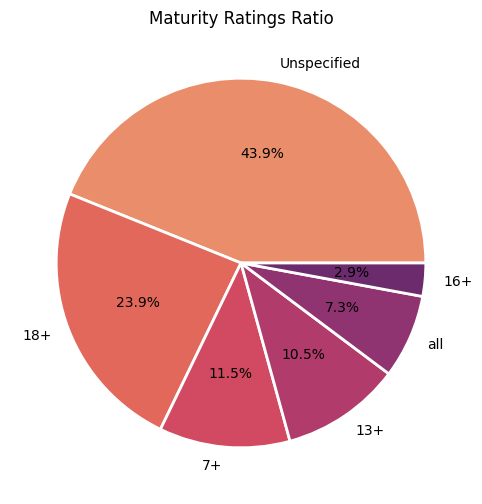

In [13]:
# Maturity Ratings
plt.figure(figsize=(6,6))
palette_color = sns.color_palette('flare') 
plt.pie(x=age_counts.values,
       labels=age_counts.index,
       autopct='%.1f%%', colors=palette_color,
       wedgeprops={'linewidth':2.0, 'edgecolor':'white'}
       )

plt.title('Maturity Ratings Ratio')
plt.show()

**Comment:** Almost half of the titles in the dataset have unspecified maturity ratings

Text(0.5, 1.0, 'Disney+')

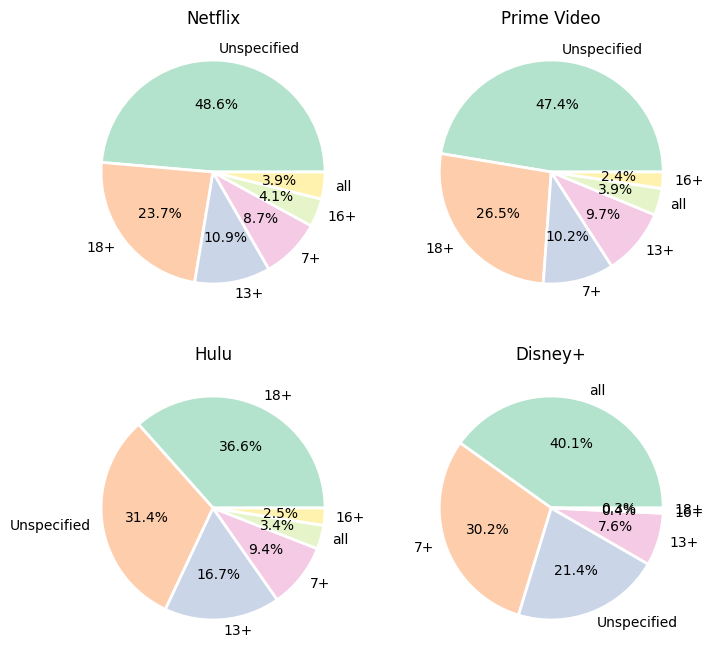

In [22]:
# Maturity Ratings per Streaming Service
fig, axs = plt.subplots(2,2, figsize=(8,8))
palette_color = sns.color_palette('Pastel2')

# Netflix
axs[0,0].pie(x=netflix_age.values,
       labels=netflix_age.index,
       autopct='%.1f%%', colors=palette_color,
       wedgeprops={'linewidth':2.0, 'edgecolor':'white'},
       )
axs[0,0].set_title("Netflix")

# Prime Video
axs[0,1].pie(x=prime_age.values,
       labels=prime_age.index,
       autopct='%.1f%%', colors=palette_color,
       wedgeprops={'linewidth':2.0, 'edgecolor':'white'}
       )
axs[0,1].set_title("Prime Video")

# Hulu
axs[1,0].pie(x=hulu_age.values,
       labels=hulu_age.index,
       autopct='%.1f%%', colors=palette_color,
       wedgeprops={'linewidth':2.0, 'edgecolor':'white'}
       )
axs[1,0].set_title("Hulu")

# Disney+
axs[1,1].pie(x=disney_age.values,
       labels=disney_age.index,
       autopct='%.1f%%', colors=palette_color,
       wedgeprops={'linewidth':2.0, 'edgecolor':'white'}
       )
axs[1,1].set_title("Disney+")

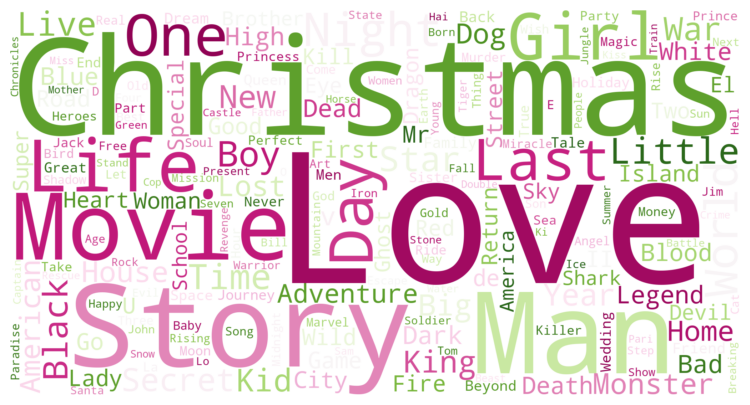

In [23]:
# Most Common Words in Movie Titles (Overall)

txt1 = " ".join(title for title in df['Title'])

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080,colormap='PiYG_r').generate(txt1)

plt.figure(figsize=(15,5))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

## Bang for your Buck?

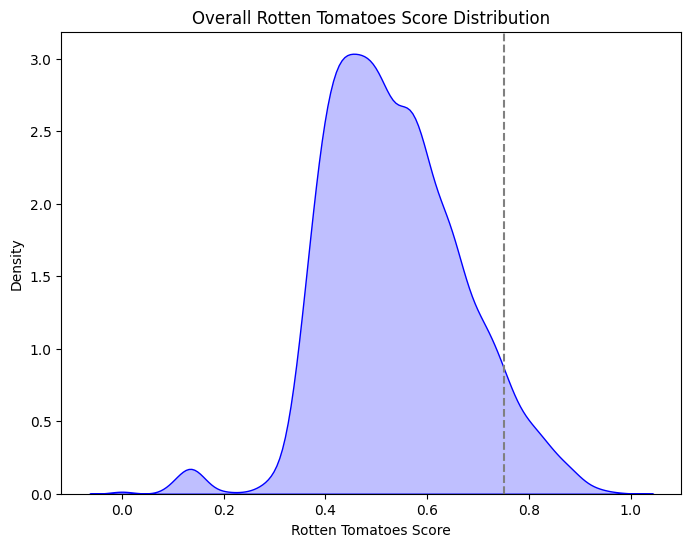

In [24]:
# Overall Rotten Tomatoes Score Distribution
plt.figure(figsize=(8,6))
ax = sns.kdeplot(data=df,
                 x='Rotten Tomatoes',
                 fill=True,
                 color="blue")

ax.axvline(x = 0.75,
           ymin = 0,
           ymax = 1,
           color = "grey",
           linestyle = "dashed")

plt.xlabel("Rotten Tomatoes Score")
plt.title("Overall Rotten Tomatoes Score Distribution")
plt.show()

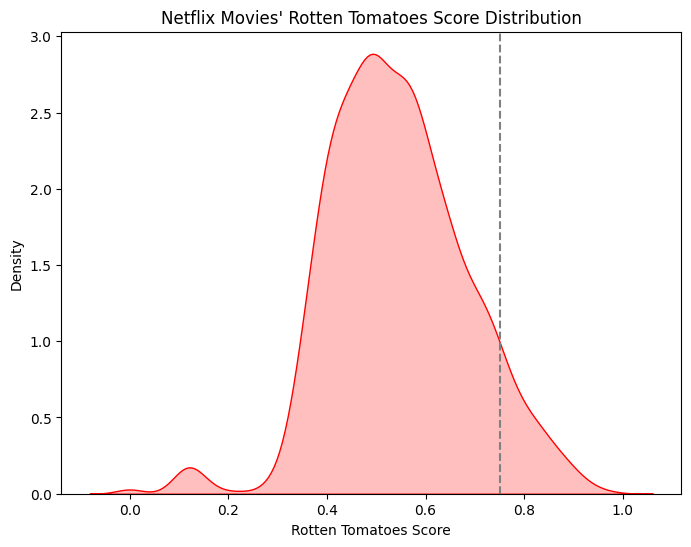

In [25]:
# Netflix Movies' Rotten Tomatoes Score Distribution
plt.figure(figsize=(8,6))
ax = sns.kdeplot(data=netflix,
                 x='Rotten Tomatoes',
                 fill=True,
                 color="red")

ax.axvline(x = 0.75,
           ymin = 0,
           ymax = 1,
           color = "grey",
           linestyle = "dashed")

plt.xlabel("Rotten Tomatoes Score")
plt.title("Netflix Movies' Rotten Tomatoes Score Distribution")
plt.show()

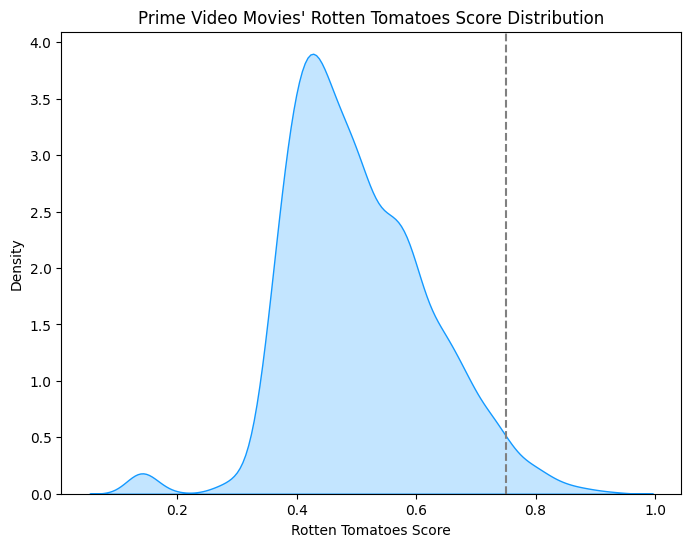

In [26]:
# Prime Video Movies' Rotten Tomatoes Score Distribution
plt.figure(figsize=(8,6))
ax = sns.kdeplot(data=prime,
                 x='Rotten Tomatoes',                 
                 fill=True,
                 color="#1399FF")

ax.axvline(x = 0.75,
           ymin = 0,
           ymax = 1,
           color = "grey",
           linestyle = "dashed")

plt.xlabel("Rotten Tomatoes Score")
plt.title("Prime Video Movies' Rotten Tomatoes Score Distribution")
plt.show()

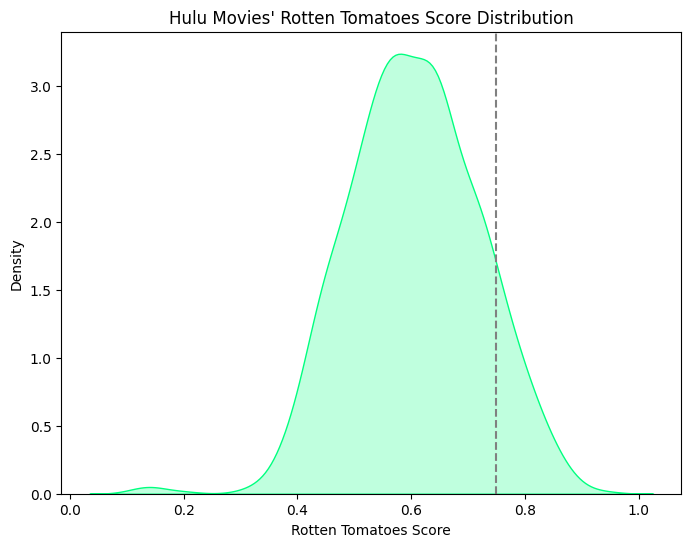

In [27]:
# Hulu Movies' Rotten Tomatoes Score Distribution
plt.figure(figsize=(8,6))
ax = sns.kdeplot(data=hulu,
                 x='Rotten Tomatoes',
                 fill=True,
                 color="springgreen")

ax.axvline(x = 0.75,
           ymin = 0,
           ymax = 1,
           color = "grey",
           linestyle = "dashed")

plt.xlabel("Rotten Tomatoes Score")
plt.title("Hulu Movies' Rotten Tomatoes Score Distribution")
plt.show()

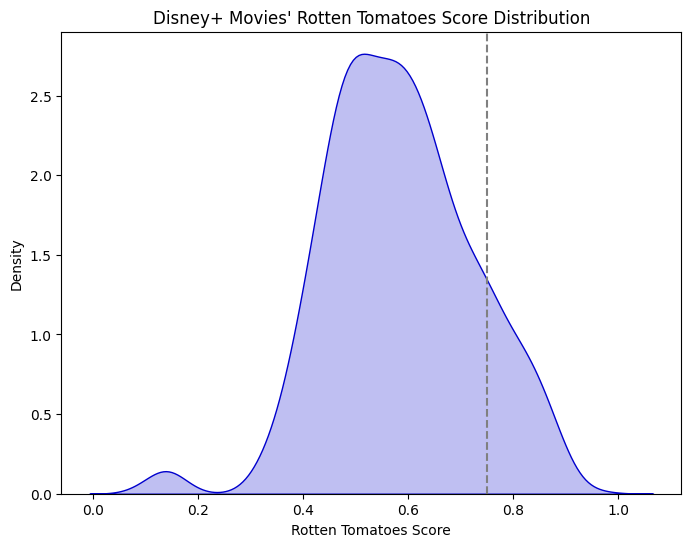

In [28]:
# Disney+ Movies' Rotten Tomatoes Score Distribution
plt.figure(figsize=(8,6))
ax = sns.kdeplot(data=disney,
                 x='Rotten Tomatoes',
                 fill=True,
                 color="mediumblue")

ax.axvline(x = 0.75,
           ymin = 0,
           ymax = 1,
           color = "grey",
           linestyle = "dashed")

plt.xlabel("Rotten Tomatoes Score")
plt.title("Disney+ Movies' Rotten Tomatoes Score Distribution")
plt.show()

In [29]:
# Ratio of "Fresh" Movies to Total Number of Movies available per Streaming Service
netflix_fresh = netflix[netflix["Rotten Tomatoes"] >= 0.75]
prime_fresh = prime[prime["Rotten Tomatoes"] >= 0.75]
hulu_fresh = hulu[hulu["Rotten Tomatoes"] >= 0.75]
disney_fresh = disney[disney["Rotten Tomatoes"] >= 0.75]

netflix_ratio = (len(netflix_fresh.index)/len(netflix.index))*100
prime_ratio = (len(prime_fresh.index)/len(prime.index))*100
hulu_ratio = (len(hulu_fresh.index)/len(hulu.index))*100
disney_ratio = (len(disney_fresh.index)/len(disney.index))*100

print("Percentage of 'Fresh' Movies on Netflix:", "{:.2f}".format(netflix_ratio), "%")
print("Percentage of 'Fresh' Movies on Prime Video:", "{:.2f}".format(prime_ratio), "%")
print("Percentage of 'Fresh' Movies on Hulu:", "{:.2f}".format(hulu_ratio), "%")
print("Percentage of 'Fresh' Movies on Disney+:", "{:.2f}".format(disney_ratio), "%")

Percentage of 'Fresh' Movies on Netflix: 8.61 %
Percentage of 'Fresh' Movies on Prime Video: 3.04 %
Percentage of 'Fresh' Movies on Hulu: 11.56 %
Percentage of 'Fresh' Movies on Disney+: 14.32 %


## Conclusion

1. Amazon Prime Video focuses on quantity over quality (most number of titles, lowest Fresh* ratio) while Disney+ prioritizes quality over quantity (least titles, highest Fresh* ratio)
2. Maturity Ratings information may not be accurate due to insufficient information. However, Disney+ appears to be the most "family-friendly" service whereas Hulu focuses most on mature movies
3. Based on the word cloud, most common themes in movies are romance and Christmas



*"Fresh": Titles rated 75% or higher on Rotten Tomatoes